In [1]:
import trino
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
conn = trino.dbapi.connect(
    host='localhost', 
    port=8080,               
    user='TrinoPython',          
    catalog='iceberg',         
    schema='gold'           
)

cur = conn.cursor()
cur.execute("""
    SELECT *
    FROM fact_daily_ohlcv
    WHERE date >= DATE '2022-01-01'
    AND date < DATE '2025-12-01'
""")

In [3]:
rows = cur.fetchall()
df = pd.DataFrame(rows, columns=[col[0] for col in cur.description])
df

,id,symbol,date,open,high,low,close,volume,return,range,...,ema_20_dist_pct,rsi_14,rsi_14_scaled,vol_ema_10,rvol_10,pct_change_std,label_1,label_2,label_3,ingest_timestamp
0,ACB1641254400,ACB,2022-01-04,16.32,16.32,16.06,16.13,4555000,NaN,0.26,...,0.000000,NaN,NaN,4555000,1.000000,NaN,1,1,1,2025-12-13 13:56:03.626800+00:00
1,ACB1641340800,ACB,2022-01-05,16.11,16.11,15.78,15.80,5934500,-0.020459,0.33,...,-0.018546,NaN,NaN,4805818,1.234857,NaN,1,1,1,2025-12-13 13:56:03.626800+00:00
2,ACB1641427200,ACB,2022-01-06,15.71,15.95,15.52,15.83,5673700,0.001899,0.43,...,-0.015118,NaN,NaN,4963614,1.143058,NaN,1,1,1,2025-12-13 13:56:03.626800+00:00
3,ACB1641513600,ACB,2022-01-07,15.90,15.92,15.62,15.62,3323800,-0.013266,0.30,...,-0.025568,NaN,NaN,4665466,0.712426,NaN,1,1,1,2025-12-13 13:56:03.626800+00:00
4,ACB1641772800,ACB,2022-01-10,15.48,15.66,15.45,15.48,5693200,-0.008963,0.21,...,-0.031137,NaN,NaN,4852327,1.173293,NaN,1,1,1,2025-12-13 13:56:03.626800+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29215,VRE1763942400,VRE,2025-11-24,32.30,34.45,32.25,34.45,26444000,0.069876,2.20,...,0.039704,54.112554,0.541126,10720698,2.466630,0.037748,1,1,1,2025-12-13 13:56:03.626800+00:00
29216,VRE1764028800,VRE,2025-11-25,35.40,35.40,33.30,33.40,12123000,-0.030479,2.10,...,0.007246,53.879310,0.538793,10975662,1.104535,0.037931,1,1,1,2025-12-13 13:56:03.626800+00:00
29217,VRE1764115200,VRE,2025-11-26,33.50,34.40,33.35,33.85,7893300,0.013473,1.05,...,0.018797,58.008658,0.580087,10415232,0.757861,0.037851,2,1,1,2025-12-13 13:56:03.626800+00:00
29218,VRE1764201600,VRE,2025-11-27,34.10,34.90,33.65,33.65,7224500,-0.005908,1.25,...,0.011546,60.360360,0.603604,9835099,0.734563,0.036952,2,2,1,2025-12-13 13:56:03.626800+00:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29220 entries, 0 to 29219
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   id                29220 non-null  object             
 1   symbol            29220 non-null  object             
 2   date              29220 non-null  object             
 3   open              29220 non-null  float64            
 4   high              29220 non-null  float64            
 5   low               29220 non-null  float64            
 6   close             29220 non-null  float64            
 7   volume            29220 non-null  int64              
 8   return            29190 non-null  float64            
 9   range             29220 non-null  float64            
 10  body              29220 non-null  float64            
 11  upper_wick        29220 non-null  float64            
 12  lower_wick        29220 non-null  float64            
 13  b

In [5]:
def plot_movement_labels(df: pd.DataFrame, symbol: str, label_col: str):
    df_per_symbol = df[df['symbol'] == symbol].copy()
    
    plt.figure(figsize=(16,6))
    plt.plot(df_per_symbol['date'], df_per_symbol['close'], label='Close Price', color='blue')

    colors = {0:'red', 1:'orange', 2:'green'}
    for label in [0,1,2]:
        df_label = df_per_symbol[df_per_symbol[label_col] == label]
        plt.scatter(df_label['date'], df_label['close'], 
                    color=colors[label], label=f'label_{label}', s=40, alpha=0.4)

    plt.title(f"{symbol} Close Price with {label_col}")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.legend()
    plt.grid(True)
    plt.show()

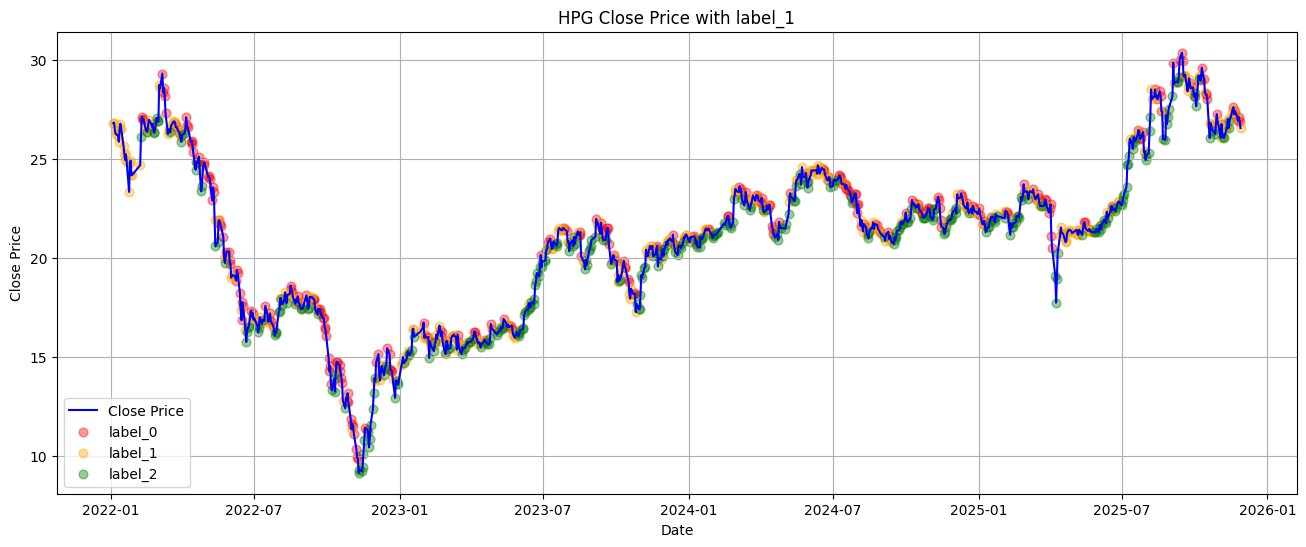

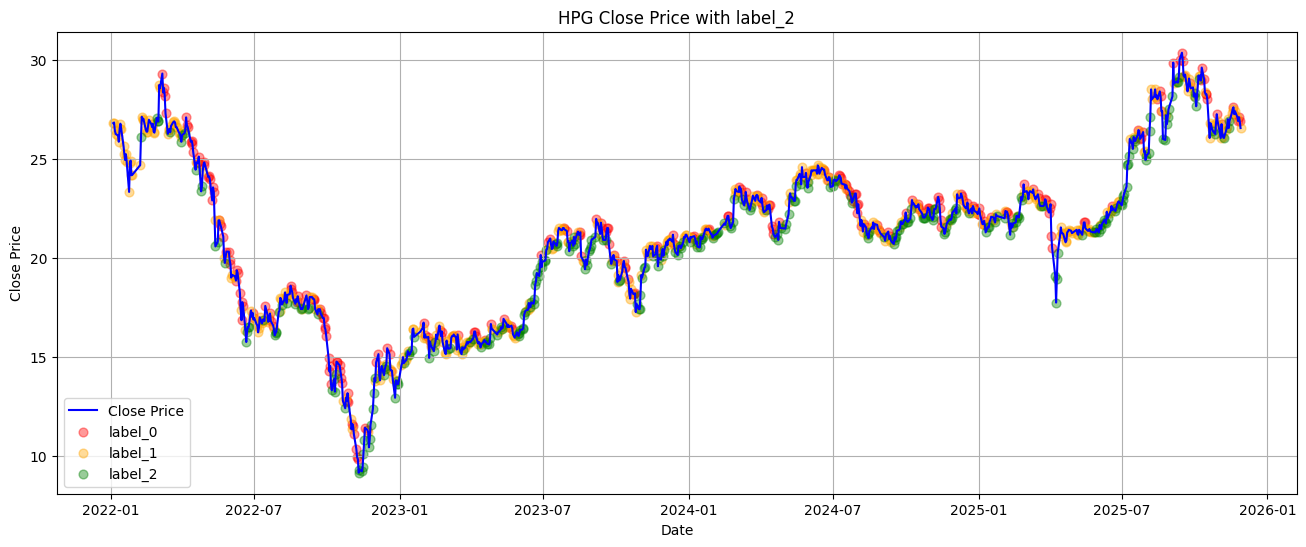

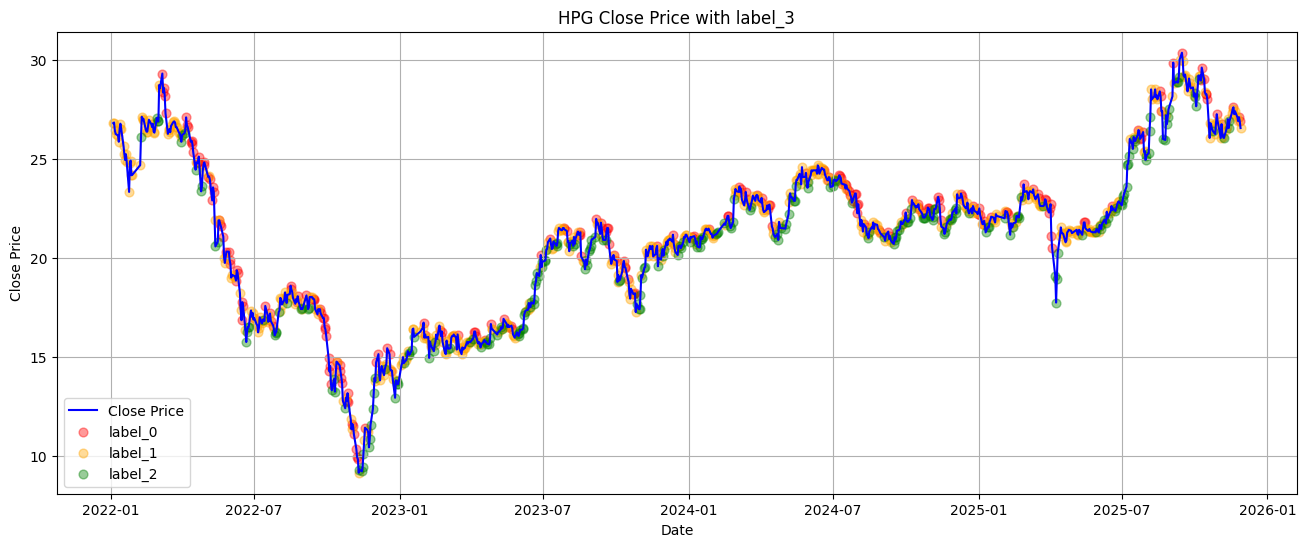

In [6]:
for label_idx in range(1, 4):
    plot_movement_labels(df, symbol="HPG", label_col=f"label_{label_idx}")